In [1]:
%%capture
! pip install gym gym[box2d]
! pip install ffmpeg-python

In [2]:
# simple neural network implementation of qlearning
import gym

from matplotlib import pyplot as plt

# RL using OpenAI Gym: https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
# Deep Q-Learning: https://github.com/adventuresinML/adventures-in-ml-code/blob/master/r_learning_tensorflow.py

/Users/broxoli/miniforge3/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


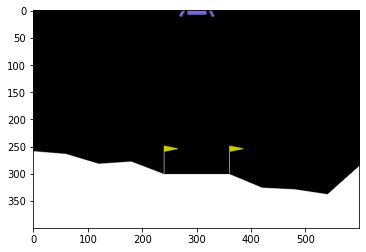

In [3]:
import gym

"""
Observation Space has 8 states
===============================

1- The coordinates of the lander in x & y.
2- Its linear velocities in x & y.
3- Its angle.
4- Its angular velocity.
5- Two booleans that represent whether each leg is in contact with the ground or not.

Action Space has 4 discrete actions
===================================
1- Do nothing.
2- Fire left orientation engine.
3- Fire main engine.
4- Fire right orientation engine.

"""



env = gym.make("LunarLander-v2")
observation, info = env.reset(seed=42, return_info=True)
observation, info

image = env.render(mode='rgb_array')
plt.imshow(image)
# for _ in range(1000):
#    env.render()
#    action = policy(observation)  # User-defined policy function
#    observation, reward, done, info = env.step(action)

#    if done:
#       observation, info = env.reset(return_info=True)
# env.close()

In [4]:
# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space

print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
The action space: Discrete(4)


Step 0: The new observation is [-0.01112251  1.4179975  -0.5687932   0.14427991  0.01476502  0.16727251
  0.          0.        ] False -1.4359782430063308
Step 1: The new observation is [-0.0168169   1.420644   -0.5802097   0.11748739  0.02540762  0.21287195
  0.          0.        ] False -1.8823423231084166
Step 2: The new observation is [-0.02251177  1.4226922  -0.580242    0.09080859  0.03604814  0.21283007
  0.          0.        ] False -0.808668612310953
Step 3: The new observation is [-0.02820702  1.4241415  -0.58027333  0.0641324   0.04668745  0.21280567
  0.          0.        ] False -0.86916850316004
Step 4: The new observation is [-0.03390265  1.4249926  -0.58030427  0.03745612  0.05732501  0.21277097
  0.          0.        ] False -0.931777177619864
Step 5: The new observation is [-0.03971519  1.4264959  -0.5916588   0.06638227  0.06763296  0.20617802
  0.          0.        ] False -2.8820015174821547
Step 6: The new observation is [-0.04543791  1.4274173  -0.580368   

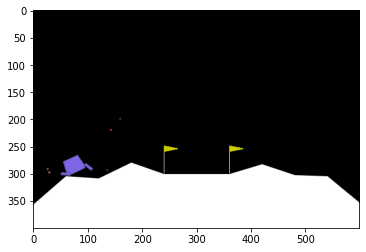

In [5]:
import time 

# Number of steps you run the agent for 
num_steps = 150

obs = env.reset()

for step in range(num_steps):
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs) 
    action = env.action_space.sample()
    
    # apply the action
    obs, reward, done, info = env.step(action)
    print("Step {}: The new observation is {}".format(step, obs), done, reward)

    
    # Render the env
    image = env.render(mode='rgb_array')
    plt.imshow(image)

    # Wait a bit before the next frame unless you want to see a crazy fast video
    time.sleep(0.001)
    
    # If the epsiode is up, then start another one
    if done:
        break

# Close the env
# env.close()

In [6]:
# Needed for training the network
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

# Needed for animation
import matplotlib.pyplot as plt

def construct_q_network(state_dim, action_dim):
    """Construct the critic network with q-values per action as output"""
    inputs = layers.Input(shape=(state_dim))  # input dimension
    hidden1 = layers.Dense(10, activation="relu")(inputs)
    hidden2 = layers.Dense(10, activation="relu")(hidden1)
    hidden3 = layers.Dense(10, activation="relu")(hidden2)
    q_values = layers.Dense(action_dim, activation='linear')(hidden3)

    network = keras.Model(inputs=inputs, outputs=[q_values])
    network.compile(optimizer='adam', loss='mse')

    return network


def mean_squared_error_loss(q_value, reward):
    """Compute mean squared error loss"""
    loss = 0.5 * (q_value - reward) ** 2

    return loss


N_STATES = env.observation_space.shape[0]
N_ACTIONS = env.action_space.n
N_EPISODES = 5
EXPLORATION_RATE = .1

print(N_STATES, N_ACTIONS, N_EPISODES, EXPLORATION_RATE)

model = construct_q_network(N_STATES, N_ACTIONS)
opt = tf.keras.optimizers.Adam()
obs = env.reset()

/Users/broxoli/miniforge3/lib/python3.9/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/broxoli/miniforge3/lib/python3.9/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/broxoli/miniforge3/lib/python3.9/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the desc

8 4 5 0.1
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [43]:
GAMMA = 0.95

def choose_action(model, state):
    random_action = lambda: np.random.randint(N_ACTIONS)
    
    def predicted_action():
        q_values = model(tf.expand_dims(state, 0))
        action = tf.squeeze(tf.argmax(q_values, axis=1))
        return action.numpy()

    # Choose between the greey move or the random move.
    # Greedy move take the greedy approach to chose the best current action.
    epsilon = np.random.rand()
    action =  random_action() if epsilon <= EXPLORATION_RATE else predicted_action()

    return action

def obs_to_state(obs):
    state = np.squeeze(obs)
    return state

def play(model, state):
    return choose_action(model, state)

def capped_append(memory, data, max_size=16):
    memory.append(data)
    if len(memory) > max_size: memory.pop(0)

def batch_train(step_id, model, memory, bs=4):
    memory_batch = memory[-bs:]
    X = []
    Y = []

    for state, action, reward, next_state, done in memory_batch:
        reward += 0 if done else GAMMA * np.amax(model.predict(tf.expand_dims(next_state, 0))[0])

        target = model.predict(tf.expand_dims(state, 0))
        target[0][action] = reward

        X.append(state)
        Y.append(target)
    
    with tf.GradientTape() as tape:
        q_values = model(tf.stack(X))
        loss = tf.reduce_mean(tf.square(q_values - tf.stack(Y)))
        grads = tape.gradient(loss, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))

        print('Step: ', step_id, 'Loss: ', loss.numpy())
    
obs = env.reset()
memory = []
images = []

for step_id in range(1000):
    state = obs_to_state(obs)
    action = play(model, state)
    obs, reward, done, _ = env.step(action)
    capped_append(memory, (state, action, reward, obs_to_state(obs), done))
    
    # Render the env
    image = env.render(mode='rgb_array')
    images.append(image)

    batch_train(step_id, model, memory)

    if done:
        print('Finished after Step: ', step_id)
        obs = env.reset()

Step:  0 Loss:  0.2374959
Step:  1 Loss:  0.25885937
Step:  2 Loss:  0.2699691
Step:  3 Loss:  0.9541627
Step:  4 Loss:  0.9707625
Step:  5 Loss:  0.9775095
Step:  6 Loss:  0.98116446
Step:  7 Loss:  0.30525386
Step:  8 Loss:  0.30178857
Step:  9 Loss:  0.2929194
Step:  10 Loss:  0.27786842
Step:  11 Loss:  0.25622568
Step:  12 Loss:  0.4174358
Step:  13 Loss:  0.40927434
Step:  14 Loss:  0.39235103
Step:  15 Loss:  0.36840346
Step:  16 Loss:  0.15063646
Step:  17 Loss:  0.097043455
Step:  18 Loss:  0.05298369
Step:  19 Loss:  0.024042325
Step:  20 Loss:  0.014255213
Step:  21 Loss:  0.025192752
Step:  22 Loss:  0.055516332
Step:  23 Loss:  0.10134377
Step:  24 Loss:  0.09467633
Step:  25 Loss:  0.07847481
Step:  26 Loss:  0.088016376
Step:  27 Loss:  0.09290188
Step:  28 Loss:  0.15413482
Step:  29 Loss:  0.22231515
Step:  30 Loss:  0.18149409
Step:  31 Loss:  0.18355937
Step:  32 Loss:  0.1777664
Step:  33 Loss:  0.16462779
Step:  34 Loss:  0.21984836
Step:  35 Loss:  0.21983115
Step

In [45]:
from PIL import Image

pil_image = Image.fromarray(np.copy(images[0]))

pil_image.save(
    'pillow_imagedraw.gif',
    append_images=list(map(lambda im: Image.fromarray(im), images[1:])),
    save_all=True, duration=5, loop=0
)

In [44]:
len(images)

1000